# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ammar Muhammad Zikra
- **Email:** ammarmuhammadzikra23@gmail.com
- **ID Dicoding:** ammarmz

## Menentukan Pertanyaan Bisnis

- Produk manakah yang memiliki penjualan terbaik dan terburuk?
- Produk manakah yang memiliki bintang 1 terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import semua library yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [12]:
# Panggil dataset products
products_df = pd.read_csv("products_dataset.csv")
# Panggil dataset order reviews, error_bad_lines = False akan menghilangkan lines yang tidak sesuai/menyebabkan error ketika di-return
or_df = pd.read_csv("order_reviews_dataset.csv", error_bad_lines=False)
# Panggil dataset order items
oi_df = pd.read_csv("order_items_dataset.csv")

# Untuk cek dataset yang telah dipanggil
products_df.head()
or_df.head()
oi_df.head()

<ipython-input-12-aef108d15ec5>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  or_df = pd.read_csv("order_reviews_dataset.csv", error_bad_lines=False)
Skipping line 57561: expected 7 fields, saw 9



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

In [31]:
# Untuk memeriksa tipe data dari setiap kolom yang terdapat dalam products_df
products_df.info()
# Untuk memeriksa jumlah missing values dari masing-masing kolom
products_df.isna().sum()
# Untuk mencetak jumlah missing values
print("Jumlah missing value: ",products_df.isna().sum())
# Untuk mencetak jumlah duplikasi
print("Jumlah duplikasi: ",products_df.duplicated().sum())
# Untuk menampilkan ringkasan parameter statistik
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah missing value:  product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g    

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [32]:
# Untuk memeriksa tipe data dari setiap kolom yang terdapat dalam or_df
or_df.info()
# Untuk memeriksa jumlah missing values dari masing-masing kolom
or_df.isna().sum()
# Untuk mencetak jumlah missing values
print("Jumlah missing value: ",or_df.isna().sum())
# Untuk mencetak jumlah duplikasi
print("Jumlah duplikasi: ",or_df.duplicated().sum())
# Untuk menampilkan ringkasan parameter statistik
or_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 106427
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB
Jumlah missing value:  review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [33]:
# Untuk memeriksa tipe data dari setiap kolom yang terdapat dalam oi_df
oi_df.info()
# Untuk memeriksa jumlah missing values dari masing-masing kolom
oi_df.isna().sum()
# Untuk mencetak jumlah missing values
print("Jumlah missing value: ",oi_df.isna().sum())
# Untuk mencetak jumlah duplikasi
print("Jumlah duplikasi: ",oi_df.duplicated().sum())
# Untuk menampilkan ringkasan parameter statistik
oi_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah missing value:  order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Cleaning Data

In [134]:
#karena terdapat missing values pada products_df, maka dilakukan penanganan missing values
products_df[products_df.product_category_name.isna()]
#karena missing values tidak memungkinkan untuk dilakukan imputation ataupun interpolation, maka dilakukan dropping
products_df.dropna(axis=0, inplace=True)

In [135]:
#karena terdapat duplikasi data pada or_df, maka dilakukan penghapusan duplikasi
or_df.drop_duplicates(inplace=True)
#cek duplikasi data, apabila berjalan lancar maka "Jumlah duplikasi: 0"
print("Jumlah duplikasi: ", or_df.duplicated().sum())

#mengubah data type review_creation_date dan review_answer_timestamp menjadi datetime
datetime_columns_or = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns_or:
  or_df[column] = pd.to_datetime(or_df[column])

Jumlah duplikasi:  0


In [136]:
#mengubah data type shipping_limit_date menjadi datetime pada oi_df
datetime_columns_oi = ["shipping_limit_date"]
for column in datetime_columns_oi:
  oi_df[column] = pd.to_datetime(oi_df[column])

## Exploratory Data Analysis (EDA)

### Explore products_df and oi_df into sum_oi_df; Explore sum_oi_df and or_df

In [101]:
# INI UNTUK PERTANYAAN 1
# Dilakukan inner join untuk menggabungkan data yang beririsan antara products_df dan oi_df
sum_oi_df = pd.merge(
    left=products_df,
    right=oi_df,
    how="inner",
    left_on = "product_id",
    right_on = "product_id"
)
# Q1 didefinisikan sebagai dataframe yang mengandung product_category_name, order_id, dan order_item_id
Q1 = sum_oi_df[['product_category_name', 'order_id', 'order_item_id']]
# Dilakukan sort values untuk menampilkan data secara berurutan dari yang paling besar ke paling kecil
Q1.groupby(by="product_category_name").count().sort_values(by="order_item_id",ascending=False)

,order_id,order_item_id
product_category_name,,
cama_mesa_banho,11115,11115
beleza_saude,9670,9670
esporte_lazer,8641,8641
moveis_decoracao,8334,8334
informatica_acessorios,7827,7827
...,...,...
cds_dvds_musicais,14,14
la_cuisine,14,14
pc_gamer,9,9


In [107]:
# INI UNTUK PERTANYAAN 2
# Dilakukan inner join untuk menggabungkan data yang beririsan antara Q1 dan or_df
sum_or_df = pd.merge(
    left=Q1,
    right=or_df,
    how="inner",
    left_on = "order_id",
    right_on = "order_id"
)
# Q2 didefinisikan sebagai dataframe yang mengandung product_category_name, order_id, dan review_score
Q2 = sum_or_df[['product_category_name','order_id', 'review_score']]

In [109]:
# Melihat setiap review score masing-masing produk
Q2.groupby(by=["product_category_name", "review_score"]).count()

order_id
product_category_name     review_score          
agro_industria_e_comercio 1                   27
                          2                    7
                          3                   13
                          4                   57
                          5                  108
...                                          ...
utilidades_domesticas     1                  837
                          2                  249
                          3                  594
                          4                 1278
                          5                 3985

[348 rows x 1 columns]

In [108]:
# Melihat review score 1 setiap produk
Q2.groupby(by=["product_category_name", "review_score"]).count().loc[(slice(None), 1), :]

,,order_id
product_category_name,review_score,
agro_industria_e_comercio,1,27
alimentos,1,51
alimentos_bebidas,1,17
artes,1,31
artes_e_artesanato,1,3
...,...,...
sinalizacao_e_seguranca,1,20
tablets_impressao_imagem,1,5
telefonia,1,580


In [118]:
# Melihat review score 5 setiap produk
Q2.groupby(by=["product_category_name", "review_score"]).count().loc[(slice(None), 5), :]

,,order_id
product_category_name,review_score,
agro_industria_e_comercio,5,108
alimentos,5,313
alimentos_bebidas,5,178
artes,5,112
artes_e_artesanato,5,15
...,...,...
sinalizacao_e_seguranca,5,112
tablets_impressao_imagem,5,43
telefonia,5,2322


In [115]:
# Melihat produk dengan review score 1 terbanyak
Q2.groupby(by=["product_category_name", "review_score"]).count().loc[(slice(None), 1), :].sort_values(by="order_id",ascending=False)

,,order_id
product_category_name,review_score,
cama_mesa_banho,1,1614
moveis_decoracao,1,1260
informatica_acessorios,1,1174
beleza_saude,1,1081
esporte_lazer,1,1028
...,...,...
la_cuisine,1,3
flores,1,2
fashion_esporte,1,2


In [120]:
# Melihat produk dengan review score 5 terbanyak
Q2.groupby(by=["product_category_name", "review_score"]).count().loc[(slice(None), 5), :].sort_values(by="order_id",ascending=False)

,,order_id
product_category_name,review_score,
beleza_saude,5,5858
cama_mesa_banho,5,5785
esporte_lazer,5,5121
moveis_decoracao,5,4452
informatica_acessorios,5,4200
...,...,...
cds_dvds_musicais,5,10
la_cuisine,5,9
fashion_roupa_infanto_juvenil,5,7


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [116]:
# Mendefinisikan top5 sebagai data yang mengandung 5 produk dengan penjualan terbaik
top5 = Q1.groupby(by="product_category_name").count().sort_values(by="order_item_id",ascending=False).head(5)
# Mendefinisikan bot5 sebagai data yang mengandung 5 produk dengan penjualan terburuk
bot5 = Q1.groupby(by="product_category_name").count().sort_values(by="order_item_id",ascending=True).head(5)

<ipython-input-138-5e056d2388c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=top5, palette=colorstop, ax=ax[0])
<ipython-input-138-5e056d2388c0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=bot5, palette=colorsbot, ax=ax[1])


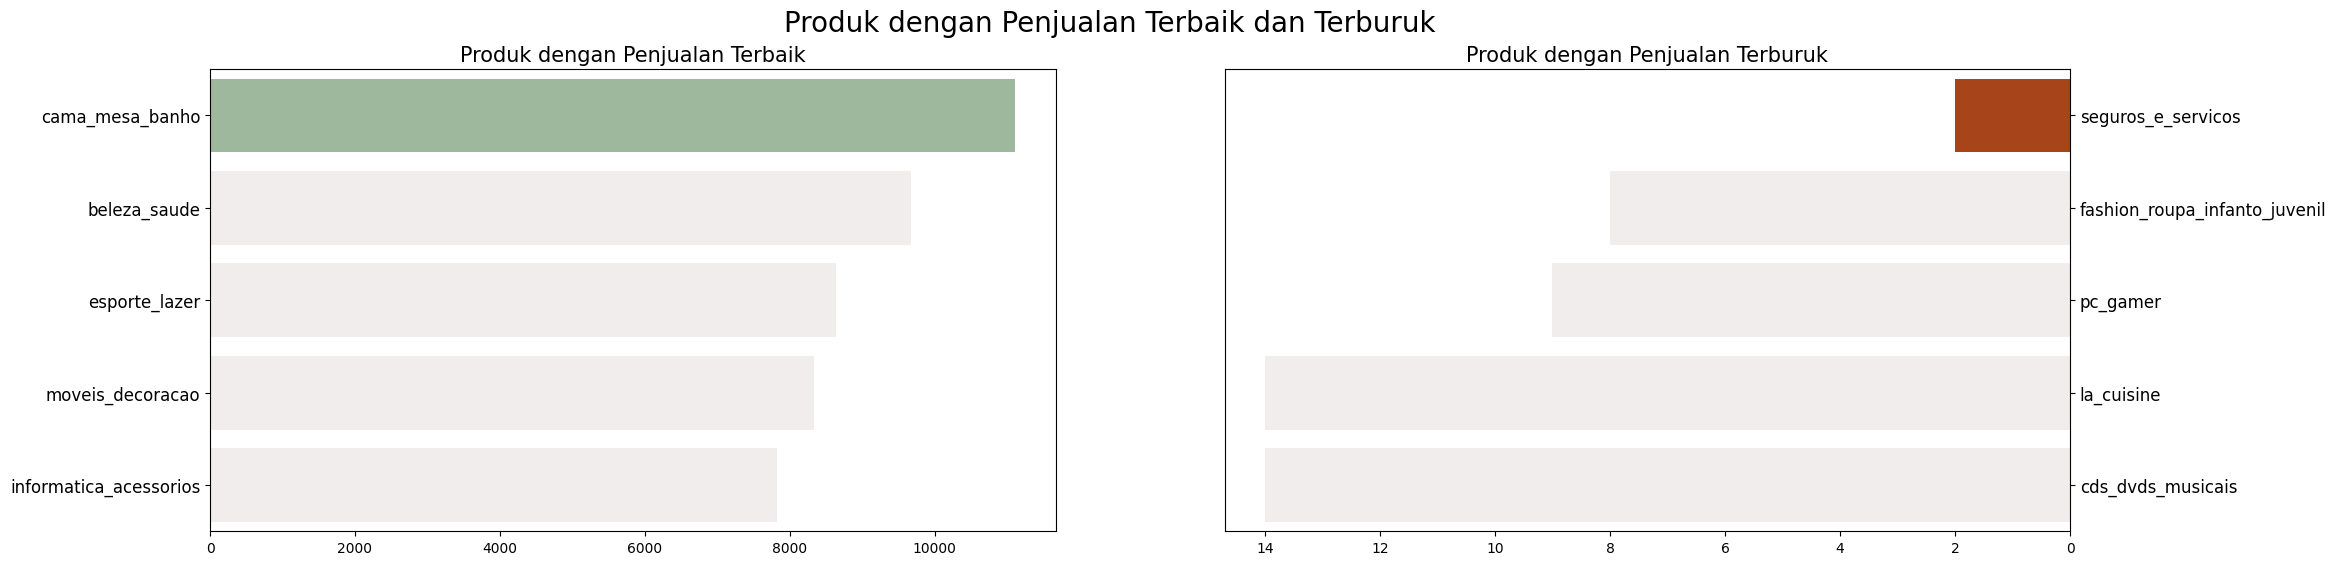

In [138]:
# Membuat kanvas kosong dengan object berupa fig dan ax
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
# Mendefinisikan palet warna yang akan digunakan
colorstop = ["#99BD98", "#F2ECEC", "#F2ECEC", "#F2ECEC", "#F2ECEC"]
colorsbot = ["#BF3A02", "#F2ECEC", "#F2ECEC", "#F2ECEC", "#F2ECEC"]

# Membuat bar plot untuk produk dengan penjualan terbaik
sns.barplot(x="order_item_id", y="product_category_name", data=top5, palette=colorstop, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Penjualan Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

 # Membuat bar plot untuk produk dengan penjualan terburuk
sns.barplot(x="order_item_id", y="product_category_name", data=bot5, palette=colorsbot, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Penjualan Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Memberikan judul pada visualisasi data
plt.suptitle("Produk dengan Penjualan Terbaik dan Terburuk", fontsize=20)
# Menampilkan hasil visualisasi data
plt.show()

### Pertanyaan 2:

In [122]:
# Mendefinisikan rs1 sebagai data yang mengandung 5 produk dengan review score 1 terbanyak
rs1 = Q2.groupby(by=["product_category_name", "review_score"]).count().loc[(slice(None), 1), :].sort_values(by="order_id",ascending=False).head(5)
# Mendefinisikan rs1 sebagai data yang mengandung 5 produk dengan review score 5 terbanyak
rs5 = Q2.groupby(by=["product_category_name", "review_score"]).count().loc[(slice(None), 5), :].sort_values(by="order_id",ascending=False).head(5)

<ipython-input-133-3c9a710fa8aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name", data=rs1, palette=colors1, ax=ax[0])
<ipython-input-133-3c9a710fa8aa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name", data=rs5, palette=colors5, ax=ax[1])


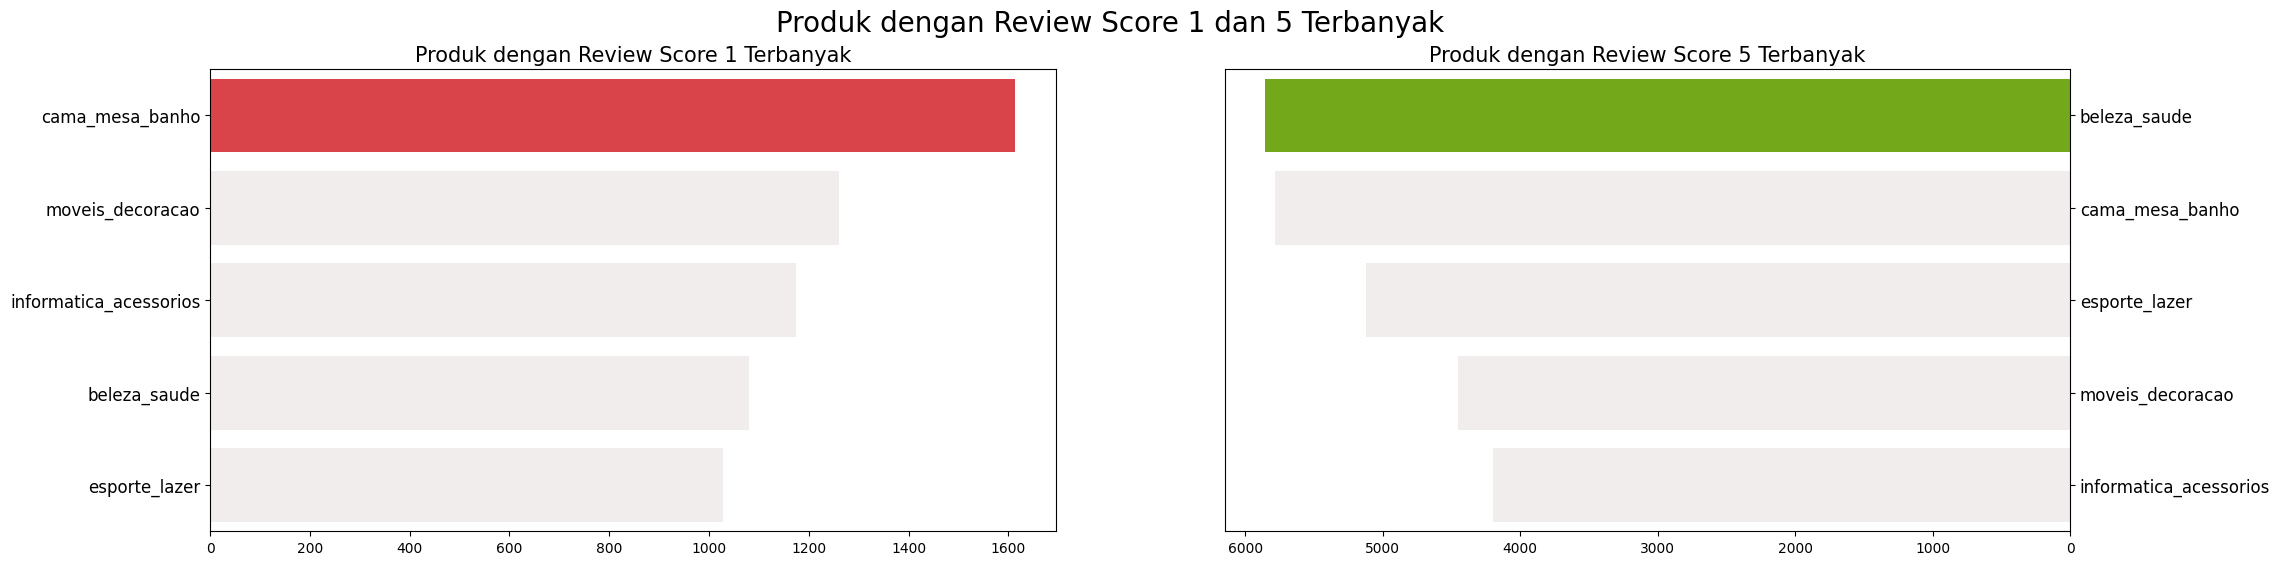

In [133]:
# Membuat kanvas kosong dengan object berupa fig dan ax
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Mendefinisikan palet warna yang akan digunakan
colors1 = ["#F22B35", "#F2ECEC", "#F2ECEC", "#F2ECEC", "#F2ECEC"]
colors5 = ["#7AC003", "#F2ECEC", "#F2ECEC", "#F2ECEC", "#F2ECEC"]

# Membuat bar plot untuk produk dengan review score 1 terbanyak
sns.barplot(x="order_id", y="product_category_name", data=rs1, palette=colors1, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Review Score 1 Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Membuat bar plot untuk produk dengan review score 5 terbanyak
sns.barplot(x="order_id", y="product_category_name", data=rs5, palette=colors5, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Review Score 5 Terbanyak", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

# Memberikan judul pada visualisasi data
plt.suptitle("Produk dengan Review Score 1 dan 5 Terbanyak", fontsize=20)
# Menampilkan hasil visualisasi data
plt.show()

## Conclusion

- Berdasarkan visualisasi data yang telah dilakukan, diketahui bahwa produk dengan penjualan terbaik adalah cama_mesa_banho yang terjual sebanyak 11115, sedangkan produk dengan penjualan terburuk adalah seguros_e_services yang terjual sebanyak 2
- Berdasarkan visualisasi data yang telah dilakukan, diketahui bahwa produk dengan review score 1 terbanyak adalah cama_mesa_banho, sedangkan produk dengan review score 5 terbanyak adalah beleza_saude

In [143]:
from google.colab import  drive
drive.mount('/drive')

Mounted at /drive


In [145]:
Q1.to_csv('/drive/My Drive/Colab Notebooks/Q1ok.csv', index=False)
Q2.to_csv('/drive/My Drive/Colab Notebooks/Q2ok.csv', index=False)